# For Google Colaboratory

## Prepare Section

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Gdrive_Document/Python/generate_mystyle/

Mounted at /content/drive
/content/drive/My Drive/Gdrive_Document/Python/generate_mystyle


In [2]:
# import
%matplotlib inline

import w100_DataHandler_v1 as dh
import w203_model_Unet as unet
import w202_model_resnet_v1 as resnet
import importlib
import matplotlib.pyplot as plt
from matplotlib import animation

importlib.reload(dh)
importlib.reload(unet)
importlib.reload(resnet)

current handler version : 2020-0406-1944
current handler version : 2020-0406-1944
current model template version : 2020-0412-1206
current style loss version : 2020-0412-1133
current handler version : 2020-0406-1944
current model template version : 2020-0412-1206
current style loss version : 2020-0412-1133
current Unet_MultiCh version : 2020-0412-1208
current style loss version : 2020-0412-1133
current handler version : 2020-0406-1944
current model template version : 2020-0412-1206
current Res-Net version : 2020-0404-1541
current handler version : 2020-0406-1944
current handler version : 2020-0406-1944
current model template version : 2020-0412-1206
current style loss version : 2020-0412-1133
current Unet_MultiCh version : 2020-0412-1208
current style loss version : 2020-0412-1133
current handler version : 2020-0406-1944
current model template version : 2020-0412-1206
current Res-Net version : 2020-0404-1541


<module 'w202_model_resnet_v1' from '/content/drive/My Drive/Gdrive_Document/Python/generate_mystyle/w202_model_resnet_v1.py'>

## Train Section

In [3]:
# load train dataset
train_data_path = './dataset/2020-0416_1950/'
cfg_train_data = {
        'path': train_data_path,
        'ext': 'png',
        'data_mode' : dh.DataSet.DataMode_TRAIN(),
        'reduce_factr' : 1,
        'patch_size' : 64,
        'stride': 30,
        'augment': 1,
        'channel_mode' : dh.DataSet.CH_SINGLE(),
        'patch_limit' : 3000000,
        'down_convert_fctr' : 1,
        }

train_data = dh.DataSet(**cfg_train_data)
train_data.preview()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# train
cfg_cnn = {
    'epochs' : 300,
    'steps_per_epoch' : 10,
    'batch_size' : 64,
    'save_distance' : 9,
    'weightsave_path' : './models/',
    'input_ch' : 3,
    'loss_weight' : [1., 1., 10000.,],
    'kernel_size' : 3,
}

# cnn = unet.Unet(**cfg_cnn)

cnn = resnet.ResNet(**cfg_cnn)

# #  when use trained weight
# weight_path = './models/ResNet_v1_weights.00009-12.59905.hdf5'
# cnn.load_weights(weight_path)

cnn.compile()
cnn.fit(train_data)


Repeat 1/ 31
Epoch 1/10
99/99 [==============================] - 58s 585ms/step - loss: 173.1044
Epoch 2/10
99/99 [==============================] - 56s 565ms/step - loss: 53.2271
Epoch 3/10
99/99 [==============================] - 56s 565ms/step - loss: 39.0358
Epoch 4/10
99/99 [==============================] - 56s 565ms/step - loss: 35.8786
Epoch 5/10
99/99 [==============================] - 56s 565ms/step - loss: 42.4843
Epoch 6/10
99/99 [==============================] - 56s 565ms/step - loss: 32.9058
Epoch 7/10
99/99 [==============================] - 56s 565ms/step - loss: 30.2495
Epoch 8/10
99/99 [==============================] - 56s 565ms/step - loss: 28.2033
Epoch 9/10
99/99 [==============================] - ETA: 0s - loss: 25.9956
Epoch 00009: saving model to ./models/ResNet_v1_weights.00009-25.99561.hdf5
99/99 [==============================] - 56s 567ms/step - loss: 25.9956
Epoch 10/10
99/99 [==============================] - 56s 565ms/step - loss: 25.9656


  0%|          | 0/3 [00:00<?, ?it/s]

data will be loaded from ./dataset/2020-0416_1950/
loading images...


 46%|████▋     | 2928/6324 [00:00<00:00, 29271.65it/s]

generating patches

shuffle data

filtering data.....


100%|██████████| 6324/6324 [00:00<00:00, 28772.05it/s]


Loading completed.
Repeat 2/ 31
Epoch 1/10
45/99 [============>.................] - ETA: 30s - loss: 26.4470

## Evaluate Section

In [0]:
# load weight
cfg_cnn = {
    'epochs' : 300,
    'steps_per_epoch' : 10,
    'batch_size' : 64,
    'save_distance' : 5,
    'weightsave_path' : './models/',
    'input_ch' : 3,
    'loss_weight' : [1., 1., 10000.,],
    'kernel_size' : 3,
}
# cnn = unet.Unet(**cfg_cnn)
cnn = resnet.ResNet(**cfg_cnn)

weight_path = './models/ResNet_v1_weights.00006-11.42988.hdf5'
cnn.load_weights(weight_path)
cnn.compile()


In [0]:
# evaluation
val_data_path = './dataset/2020-0311-1636b/002/'
cfg_val_data = {
        'path': val_data_path,
        'ext': 'png',
        'data_mode' : dh.DataSet.DataMode_VAL(),
        'channel_mode' : dh.DataSet.CH_SINGLE(),
        'resize': [1024, 1024],
        'down_convert_fctr' : 2,
        }

val_data = dh.DataSet(**cfg_val_data)

_, _, val_data = cnn.validate(val_data)
val_data.preview(max_frames=100 ,col=1, scale=10)


## Product Section

In [0]:
# load weight
cfg_cnn = {
    'epochs' : 300,
    'steps_per_epoch' : 10,
    'batch_size' : 64,
    'save_distance' : 5,
    'weightsave_path' : './models/',
    'input_ch' : 3,
    'loss_weight' : [1., 1., 10000.,],
    'kernel_size' : 3,
}
# cnn = unet.Unet(**cfg_cnn)
cnn = resnet.ResNet(**cfg_cnn)

weight_path = './models/ResNet_v1_weights.00009-37.37622.hdf5'
cnn.load_weights(weight_path)
cnn.compile()


  0%|          | 0/1 [00:00<?, ?it/s]

data will be loaded from ./testdata/2020-0416a/
loading images...
Loading completed.


100%|██████████| 1/1 [00:09<00:00,  9.87s/it]


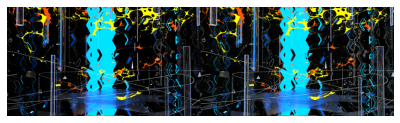

In [6]:
# predict
pred_data_path = './testdata/2020-0416a/'
cfg_pred_data = {
        'path': pred_data_path,
        'ext': 'png',
        'data_mode' : dh.DataSet.DataMode_PRODUCT(),
        'channel_mode' : dh.DataSet.CH_SINGLE(),
        'resize': [1920, 1080],
        'down_convert_fctr' : 1,
        }

pred_data = dh.DataSet(**cfg_pred_data)

_, pred_data = cnn.predict(src=pred_data, save_img=True, save_path=pred_data_path)
pred_data.preview(col=1, scale=2)

## 実験メモ
Unet_weights.00005-385.27366.hdf5: loss: 0.00025, measured IQ: 43.10903 (before IQ: 51.00506)
